<a href="https://colab.research.google.com/github/hanadyG/portfolio/blob/main/instadeep_genre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import wordpunct_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
df_en = pd.read_csv("/content/sample_data/ted_talks_en.csv")
df_fr = pd.read_csv("/content/sample_data/ted_talks_fr.csv")
df_fr = df_fr.rename(columns={'title': 'title_fr', 'description': 'description_fr', 'transcript': 'transcript_fr'})
columns_to_merge = ['title_fr', 'description_fr', 'transcript_fr']
df = df_en.merge(df_fr[columns_to_merge], left_index=True, right_index=True, suffixes=('_eng', '_fr'))

In [3]:
data=pd.read_csv('/content/sample_data/ted_talks_fr.csv')

In [4]:
def create_global_embedding(data):
    arr=list(data['topics'])
    sublists=[ast.literal_eval(arr[i]) for i in range(len(arr))]
    unique_values = set(val for sublist in sublists for val in sublist)
    global_embedding = np.zeros((len(sublists), len(unique_values)))
    for i, sublist in enumerate(sublists):
        sublist_encoding = np.zeros((len(unique_values)))
        for val in sublist:
            index = list(unique_values).index(val)
            sublist_encoding[index] = 1
        global_embedding[i,:] = sublist_encoding
    return global_embedding

def count_ones(list_of_arrays):
  count = [0] * len(list_of_arrays[0]) 
  for arr in list_of_arrays:
    for i, val in enumerate(arr):
      if val == 1:
        count[i] += 1      
  return count

def sorted_indexes(arr):
    return [i[0] for i in sorted(enumerate(arr), key=lambda x:x[1], reverse=True)]

def get_top_topics(global_embedding, data):
    count = count_ones(global_embedding)
    sorted_indexes_list = sorted_indexes(count)
    arr=list(data['topics'])
    d=[ast.literal_eval(arr[i]) for i in range(len(arr))]
    unique_values = set(val for sublist in d for val in sublist)
    return [list(unique_values)[sorted_indexes_list[i]] for i in range(len(sorted_indexes_list))]

def wordcloud(words, appearances):
    wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate_from_frequencies(dict(zip(words, appearances)))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

def get_top_topics_number(global_embedding):
  count = count_ones(global_embedding)
  sorted_indexes_list = sorted_indexes(count)
  return [count[sorted_indexes_list[i]] for i in range(len(count))]


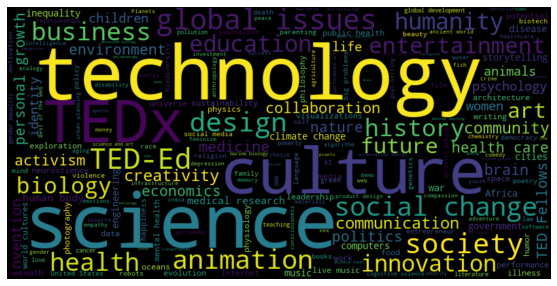

In [5]:
global_embedding = create_global_embedding(data)

# Get the top topics and the number of times they appear
top_topics = get_top_topics(global_embedding ,data)
appearances = get_top_topics_number(global_embedding )

# Generate the wordcloud using the top topics and their appearances
wordcloud(top_topics, appearances )

In [6]:
import ast
import numpy as np

def create_global_embedding(data):
    arr=list(data['topics'])
    sublists=[ast.literal_eval(arr[i]) for i in range(len(arr))]
    unique_values = set(val for sublist in sublists for val in sublist)
    global_embedding = np.zeros((len(sublists), len(unique_values)))
    for i, sublist in enumerate(sublists):
        sublist_encoding = np.zeros((len(unique_values)))
        for val in sublist:
            index = list(unique_values).index(val)
            sublist_encoding[index] = 1
        global_embedding[i,:] = sublist_encoding
    return global_embedding

def count_ones(list_of_arrays):
  count = [0] * len(list_of_arrays[0]) 
  for arr in list_of_arrays:
    for i, val in enumerate(arr):
      if val == 1:
        count[i] += 1      
  return count

def sorted_indexes(arr):
    return [i[0] for i in sorted(enumerate(arr), key=lambda x:x[1], reverse=True)]

def get_top_topics(data):
    global_embedding = create_global_embedding(data)
    count = count_ones(global_embedding)
    sorted_indexes_list = sorted_indexes(count)
    arr=list(data['topics'])
    d=[ast.literal_eval(arr[i]) for i in range(len(arr))]
    unique_values = set(val for sublist in d for val in sublist)
    return [list(unique_values)[sorted_indexes_list[i]] for i in range(len(sorted_indexes_list))]

def wordcloud(words, appearances):
    wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate_from_frequencies(dict(zip(words, appearances)))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()
def get_top_topics_number(data):
  arr=list(data['topics'])
  sublists=[ast.literal_eval(arr[i]) for i in range(len(arr))]
  unique_values = set(val for sublist in sublists for val in sublist)
  count = count_ones(create_global_embedding(data))
  sorted_indexes_list = sorted_indexes(count)
  return [count[sorted_indexes_list[i]] for i in range(len(count))]

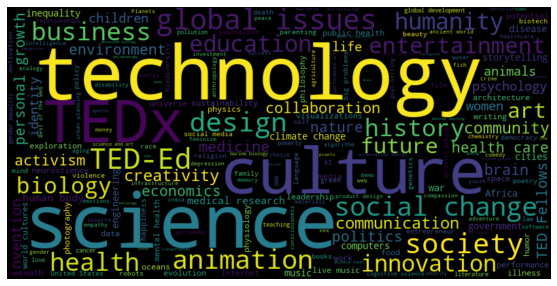

In [7]:
wordcloud(get_top_topics(data),get_top_topics_number(data))

In [8]:
data['occupations'].fillna("{[]}", inplace=True)
flat_list = [sublist for sublist in data['occupations']]
def transform_to_dict(input_list):
    data = [input_string[input_string.index("[")+1:input_string.rindex("]")].replace("'", "").replace("").strip().split(", ") for input_string in input_list]
    unique_values = set(val for sublist in data for val in sublist)
    global_embedding = np.zeros((len(data), len(unique_values)))
    for i, sublist in enumerate(data):
        sublist_encoding = np.zeros((len(unique_values)))
        for val in sublist:
            index = list(unique_values).index(val)
            sublist_encoding[index] = 1
        global_embedding[i,:] = sublist_encoding
    return global_embedding

In [9]:
def create_global_embedding(data):
    arr=list(data['topics'])
    sublists=[ast.literal_eval(arr[i]) for i in range(len(arr))]
    unique_values = set(val for sublist in sublists for val in sublist)
    global_embedding = np.zeros((len(sublists), len(unique_values)))
    for i, sublist in enumerate(sublists):
        sublist_encoding = np.zeros((len(unique_values)))
        for val in sublist:
            index = list(unique_values).index(val)
            sublist_encoding[index] = 1
        global_embedding[i,:] = sublist_encoding
    return global_embedding

In [10]:
def create_global_embedding(input_list):
    sublists=[input_string[input_string.index("[")+1:input_string.rindex("]")].replace("'", "").strip().split(", ") for input_string in input_list]
    unique_values = set(val for sublist in sublists for val in sublist)
    global_embedding = np.zeros((len(sublists), len(unique_values)))
    for i, sublist in enumerate(sublists):
        sublist_encoding = np.zeros((len(unique_values)))
        for val in sublist:
            index = list(unique_values).index(val)
            sublist_encoding[index] = 1
        global_embedding[i,:] = sublist_encoding
    return global_embedding

In [12]:
data['occupations'].fillna("{[]}", inplace=True)
flat_list = [sublist for sublist in data['occupations']]

In [13]:
def transform_to_dict(input_list):
    data = [input_string[input_string.index("[")+1:input_string.rindex("]")].replace("'", "").strip().split(", ") for input_string in input_list]
    unique_values = set(val for sublist in data for val in sublist)
    global_embedding = np.zeros((len(data), len(unique_values)))
    for i, sublist in enumerate(data):
        sublist_encoding = np.zeros((len(unique_values)))
        for val in sublist:
            index = list(unique_values).index(val)
            sublist_encoding[index] = 1
        global_embedding[i,:] = sublist_encoding
    return global_embedding

In [14]:
def get_top_topics(global_embedding, input_list):
    count = count_ones(global_embedding)
    sorted_indexes_list = sorted_indexes(count)
    d=[input_string[input_string.index("[")+1:input_string.rindex("]")].replace("'", "").strip().split(", ") for input_string in input_list]
    unique_values = set(val for sublist in d for val in sublist)
    return [list(unique_values)[sorted_indexes_list[i]] for i in range(len(sorted_indexes_list))]

In [15]:
def sorted_indexes(arr):
    return [i[0] for i in sorted(enumerate(arr), key=lambda x:x[1], reverse=True)]

In [16]:
def get_top_topics_number(global_embedding,input_list):
  sublists=[input_string[input_string.index("[")+1:input_string.rindex("]")].replace("'", "").strip().split(", ") for input_string in input_list]
  unique_values = set(val for sublist in sublists for val in sublist)
  count = count_ones(global_embedding)
  sorted_indexes_list = sorted_indexes(count)
  return [count[sorted_indexes_list[i]] for i in range(len(count))]

In [17]:
def count_ones(list_of_arrays):
  count = [0] * len(list_of_arrays[0]) 
  for arr in list_of_arrays:
    for i, val in enumerate(arr):
      if val == 1:
        count[i] += 1      
  return count

In [18]:
def wordcloud(words, appearances):
    wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate_from_frequencies(dict(zip(words, appearances)))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

In [19]:
emb=transform_to_dict(flat_list)

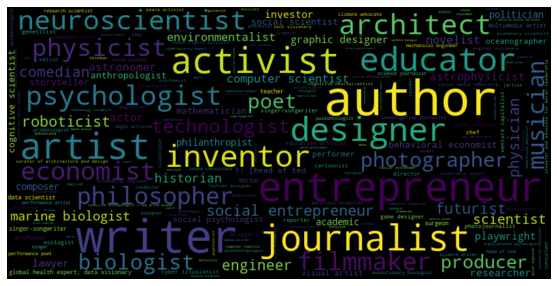

In [20]:
# Get the top topics and the number of times they appear
top_topics = get_top_topics(emb, flat_list)
appearances = get_top_topics_number(emb, flat_list)

# Generate the wordcloud using the top topics and their appearances
wordcloud(top_topics, appearances )

In [21]:
get_top_topics(emb, flat_list)

['',
 'author',
 'writer',
 'entrepreneur',
 'artist',
 'activist',
 'journalist',
 'designer',
 'educator',
 'inventor',
 'architect',
 'neuroscientist',
 'psychologist',
 'filmmaker',
 'economist',
 'physicist',
 'philosopher',
 'musician',
 'biologist',
 'photographer',
 'poet',
 'technologist',
 'producer',
 'social entrepreneur',
 'physician',
 'roboticist',
 'futurist',
 'engineer',
 'comedian',
 'scientist',
 'marine biologist',
 'historian',
 'computer scientist',
 'novelist',
 'environmentalist',
 'astrophysicist',
 'actor',
 'astronomer',
 'lawyer',
 'researcher',
 'playwright',
 'investor',
 'graphic designer',
 'academic',
 'philanthropist',
 'composer',
 'politician',
 'social scientist',
 'cognitive scientist',
 'anthropologist',
 'mathematician',
 'behavioral economist',
 'storyteller',
 'social psychologist',
 'performer',
 'visual artist',
 '1: [head of ted',
 'oceanographer',
 'global health expert; data visionary',
 'surgeon',
 'doctor',
 'teacher',
 'multimedia arti